In [66]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,Conv2D,MaxPooling1D,MaxPooling2D, Flatten,Dense,Dropout

In [125]:
data = pd.read_csv("BCICIV_2a_2.csv", delimiter=",")
data

,patient,time,label,epoch,EEG-Fz,EEG-0,EEG-1,EEG-2,EEG-3,EEG-4,...,EEG-8,EEG-9,EEG-10,EEG-11,EEG-12,EEG-13,EEG-14,EEG-Pz,EEG-15,EEG-16
0,2,-0.100,left,8,-6.473483,-0.150240,-2.281776,-1.853591,-2.907151,-0.644156,...,-1.051683,5.478140,1.271409,2.882737,-0.796274,-1.365309,0.435697,0.366211,-0.153996,0.371845
1,2,-0.096,left,8,-4.256242,-1.643937,-2.896566,-4.030881,-1.422333,1.133632,...,7.464386,0.566475,0.607791,-0.759397,0.542060,1.437869,0.943954,0.972124,0.403088,0.196508
2,2,-0.092,left,8,-2.624939,-3.186462,-3.413701,-1.715984,-0.962904,2.569623,...,-2.476576,1.221215,-1.081219,0.725422,2.075707,2.776203,2.624085,1.773349,2.376188,1.778983
3,2,-0.088,left,8,0.959490,-2.873518,-1.098804,-2.379603,2.816836,0.099364,...,0.375430,-0.907247,1.331335,-2.037806,0.484355,1.282507,0.642107,0.181996,1.126632,0.675911
4,2,-0.084,left,8,-0.480940,0.178240,-1.513843,0.281530,-0.820859,2.223387,...,2.450626,-0.101583,-1.427454,-0.548548,0.020487,0.672155,-0.358870,-1.356090,-0.264969,-1.448112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57883,2,0.684,foot,605,-1.144729,-2.900664,1.125779,0.598059,2.954955,-6.517701,...,-4.528894,0.583035,3.108952,1.985905,-1.090267,-3.462187,3.711791,4.290217,3.242290,7.293146
57884,2,0.688,foot,605,0.677448,0.239872,1.922565,4.519845,0.626741,-3.718962,...,-14.278983,2.258728,2.294410,3.368628,-2.588403,-4.667354,2.457796,2.743253,1.890639,4.281339
57885,2,0.692,foot,605,-0.057194,-1.031878,1.480892,3.736376,0.722178,-4.893056,...,0.025438,2.158852,2.194534,3.122268,-2.688279,-4.816058,-0.278798,0.397283,-0.162362,1.398260
57886,2,0.696,foot,605,2.020221,-1.200557,4.095416,2.981759,1.920687,-6.624235,...,-1.266287,0.818298,3.393043,0.512183,-2.026879,-3.666378,-0.593962,0.716886,-0.477525,0.155362


In [126]:
#features separation
X = data.iloc[:, 4:].values  # EEG signals
y = data['label'].values     # Motor imagery classes

In [127]:
# Convert labels to numerical values (0 for 'left', 1 for 'right')
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [128]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [129]:
# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [130]:
# Normalize the features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [164]:
# Step 4: Reshape the data for CNN (assuming EEG channels as 1D sequences)
num_channels = 2  # Number of EEG channels
num_time_points = X.shape[1] // num_channels
X_train = X_train.reshape(-1, num_channels, num_time_points, 1)
X_val = X_val.reshape(-1, num_channels, num_time_points, 1)
X_test = X_test.reshape(-1, num_channels, num_time_points, 1)


In [165]:
print(num_time_points)

11


In [179]:
# Step 5: Build the CNN Model
model = Sequential()
#model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),padding='same')
#model.add(MaxPooling1D(pool_size=2),padding='same')
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(num_channels, num_time_points, 1), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification (left vs. right)

In [180]:
# Step 6: Model Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [181]:
# Step 7: Model Training
epochs = 20
batch_size = 10000
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))


Epoch 1/20
5/5 [==============================] - 1s 105ms/step - loss: 0.3766 - accuracy: 0.2488 - val_loss: -0.2971 - val_accuracy: 0.2500
Epoch 2/20
5/5 [==============================] - 0s 82ms/step - loss: -0.5429 - accuracy: 0.2517 - val_loss: -1.1654 - val_accuracy: 0.2500
Epoch 3/20
5/5 [==============================] - 0s 82ms/step - loss: -1.4089 - accuracy: 0.2517 - val_loss: -2.1161 - val_accuracy: 0.2500
Epoch 4/20
5/5 [==============================] - 0s 90ms/step - loss: -2.3883 - accuracy: 0.2517 - val_loss: -3.2778 - val_accuracy: 0.2500
Epoch 5/20
5/5 [==============================] - 0s 82ms/step - loss: -3.6286 - accuracy: 0.2517 - val_loss: -4.7495 - val_accuracy: 0.2500
Epoch 6/20
5/5 [==============================] - 0s 81ms/step - loss: -5.1885 - accuracy: 0.2517 - val_loss: -6.6263 - val_accuracy: 0.2500
Epoch 7/20
5/5 [==============================] - 0s 80ms/step - loss: -7.1573 - accuracy: 0.2517 - val_loss: -9.0105 - val_accuracy: 0.2500
Epoch 8/20
5/

In [182]:
# Step 8: Model Evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

272/272 [==============================] - 0s 719us/step - loss: -142.1284 - accuracy: 0.2422
Test Loss: -142.1284, Test Accuracy: 0.2422


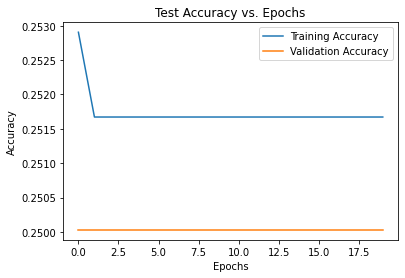

In [170]:
import matplotlib.pyplot as plt
# Plot Test Accuracy vs. Epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy vs. Epochs')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Data Preprocessing
# Load the CSV dataset
data = pd.read_csv("BCICIV_2a_1.csv")

# Separate features (EEG signals) from target labels
X = data.iloc[:, 4:].values  # EEG signals
y = data['label'].values     # Motor imagery classes

# Convert labels to numerical values (0 for 'left', 1 for 'right')
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Step 2: Data Splitting
# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 3: Data Normalization
# Normalize the features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Step 4: Reshape the data for LSTM (assuming EEG channels as 1D sequences)
num_channels = 2  # Number of EEG channels
num_time_points = X.shape[1] // num_channels
X_train = X_train.reshape(-1, num_time_points, num_channels)
X_val = X_val.reshape(-1, num_time_points, num_channels)
X_test = X_test.reshape(-1, num_time_points, num_channels)

# Step 5: Build the LSTM Model
model = Sequential()
model.add(LSTM(64, input_shape=(num_time_points, num_channels)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification (left vs. right)

# Step 6: Model Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 7: Model Training
epochs = 44
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

# Step 8: Model Evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


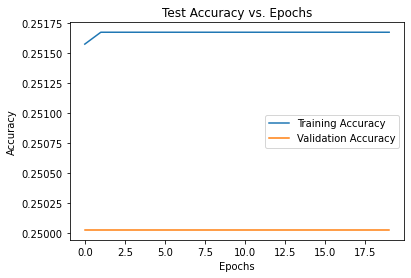

In [119]:
import matplotlib.pyplot as plt
# Plot Test Accuracy vs. Epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy vs. Epochs')
plt.legend()
plt.show()

272/272 [==============================] - 0s 955us/step - loss: -377145984.0000 - accuracy: 0.2422


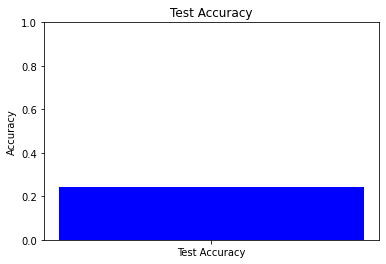

In [120]:
test_accuracy = model.evaluate(X_test, y_test)[1]
plt.bar(['Test Accuracy'], [test_accuracy], color='b')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.show()

272/272 [==============================] - 0s 867us/step - loss: -377145984.0000 - accuracy: 0.2422


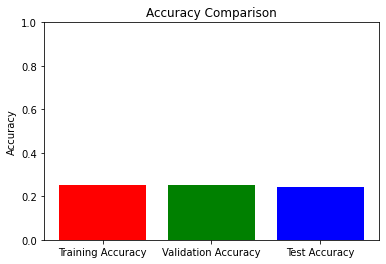

In [121]:
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
test_accuracy = model.evaluate(X_test, y_test)[1]

plt.bar(['Training Accuracy', 'Validation Accuracy', 'Test Accuracy'], [train_accuracy, val_accuracy, test_accuracy], color=['r', 'g', 'b'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

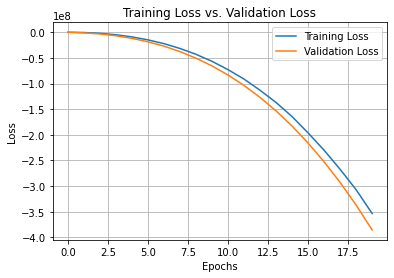

In [122]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs. Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [83]:
def merge_data(csv_files, columns, output_file):
    df = pandas.DataFrame(columns=columns)

    for file in csv_files:
        df = df.append(pandas.read_csv(file), sort=False)
    return df

In [95]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Data Preprocessing
# Load the CSV dataset
data = pd.read_csv("BCICIV_2a_all_patients.csv")

# Separate features (EEG signals) from target labels
X = data.iloc[:, 4:].values  # EEG signals
y = data['label'].values     # Motor imagery classes

# Convert labels to numerical values (0 for 'left', 1 for 'right')
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Step 2: Data Splitting
# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 3: Data Normalization
# Normalize the features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Step 4: Reshape the data for LSTM (assuming EEG channels as 1D sequences)
num_channels = 2  # Number of EEG channels
num_time_points = X.shape[1] // num_channels
X_train = X_train.reshape(-1, num_time_points, num_channels)
X_val = X_val.reshape(-1, num_time_points, num_channels)
X_test = X_test.reshape(-1, num_time_points, num_channels)

# Step 5: Build the LSTM Model
model = Sequential()
model.add(LSTM(64, input_shape=(num_time_points, num_channels)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification (left vs. right)

# Step 6: Model Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 7: Model Training
epochs = 20
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

# Step 8: Model Evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


KeyError: 'label'